<a href="https://colab.research.google.com/github/msribeiror29/Data-cleaning_Wrangling/blob/main/Prepare_your_Dataset_for_Data_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare dataset for data modeling.

Apply data cleaning and data wrangling knowledge to structure a database for modeling.

Context:
An e-commerce company has hired you to collect recency, frequency, and average ticket (RFM) indicators for its customers. RFM stands for:

R (Recency): Time since the customer made the last purchase (in days)
F (Frequency): Number of purchases made by the customer
M (Monetary): Value of the average ticket spent by the customer, where average ticket = average of the total spent per order for each customer.

To achieve this, you will receive a database (CSV file) and will need to create a Python code that produces a CSV output containing only the customer identification and RFM metrics.


#1. Read the file and inspect the data.
####Reading the dataset.

In [ ]:
!pip install sidetable
!pip install pandas-profiling==3.3

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf

In [ ]:
import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
filename = ('/content/Data - data (2).csv.csv')

In [ ]:
df = pd.read_csv(filename, encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


###Analyzing data distribution

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#2.Identifying Null Data.
####Identify and show Null values.

In [ ]:
(
   df.isna().sum()
    .to_frame("Missing_Count").sort_values('Missing_Count', ascending = False)

)

,Missing_Count
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


###When identifying null values, I create a table view that displays the variance between the actual value and the percentage of the total.

In [ ]:
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


###Visualizing a graph using the missgno library to show lines with missing values as a whole.

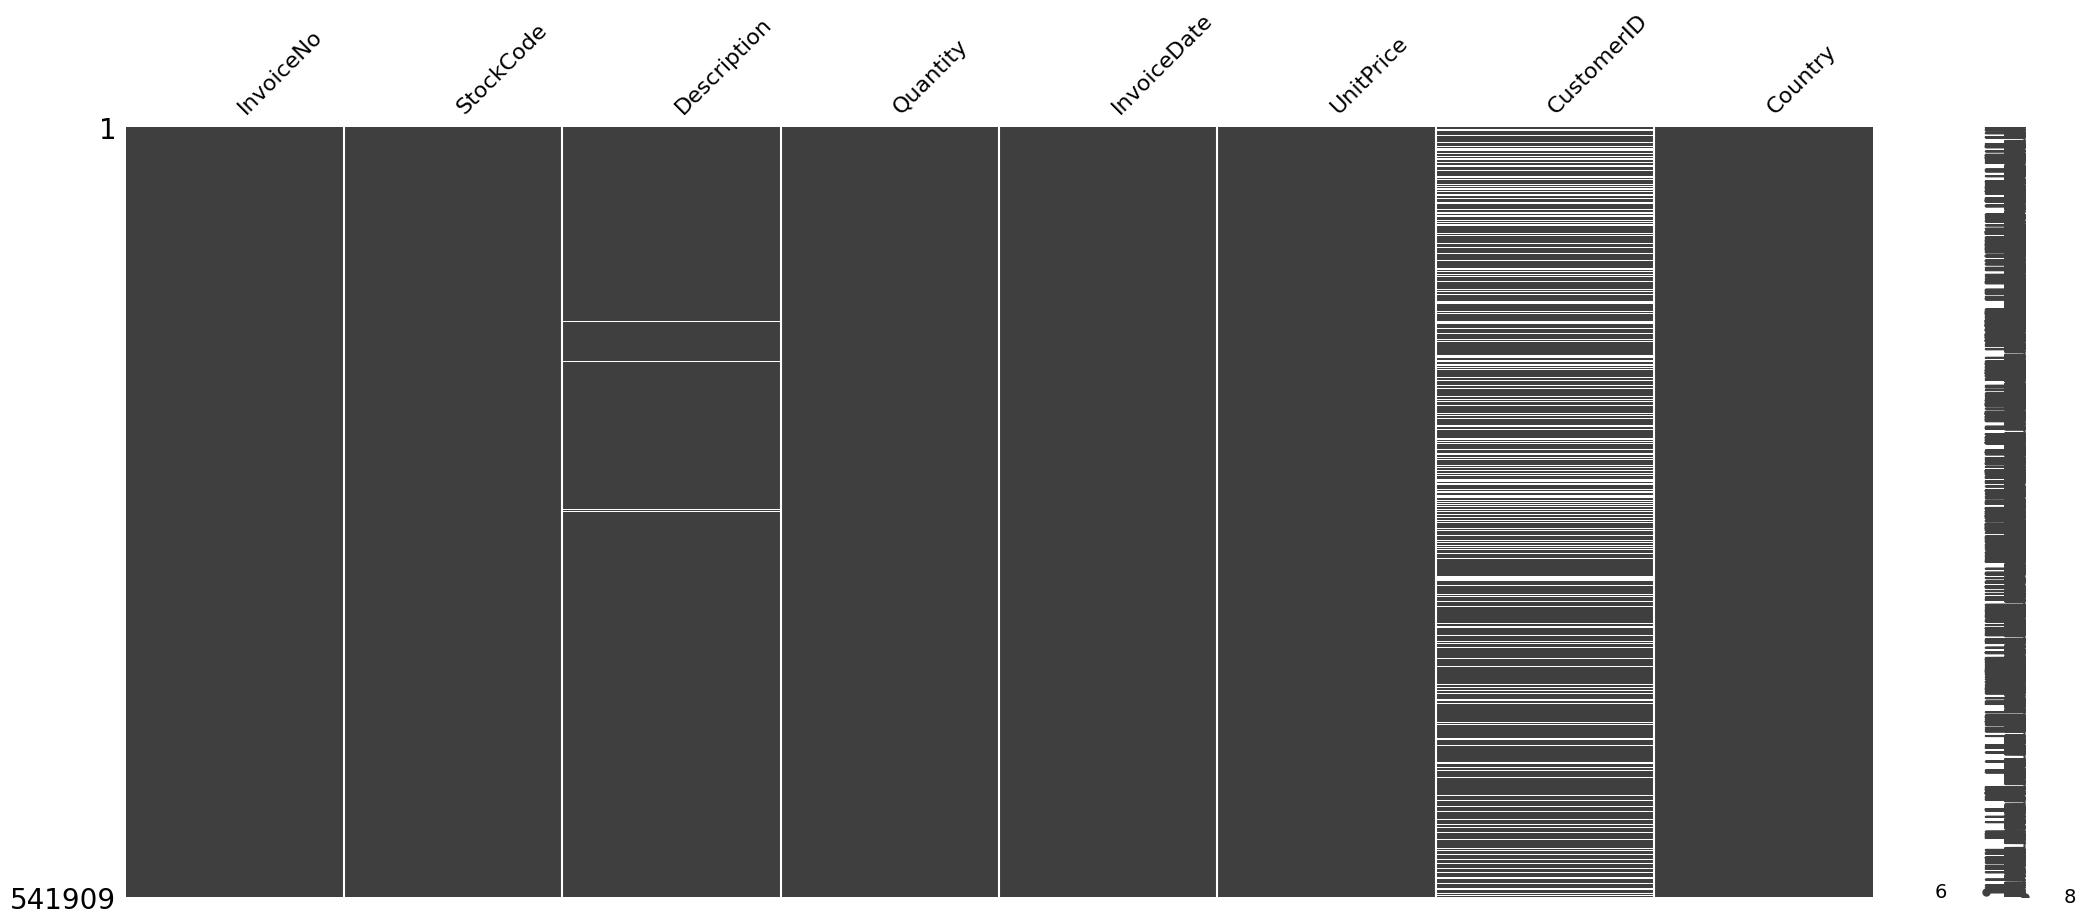

In [ ]:
msno.matrix(df);

#2.Removing null values.

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#3.Filtering Unit Prices and quantity of products equal to or less than 0.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460481,15287.690570
std,248.693370,69.315161,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


df_nas.filter(like=' ') There are no empty rows in the dataframe.

df_nas[df_nas.Quantity.isna()] there are no null values ​​in the Quantity column.

df_nas[df_nas.UnitPrice.isna()] there are no null values ​​in the UnitPrice column.

In [ ]:
df.filter(like=' ')

""
0
1
2
3
4
...
541904
541905
541906
541907


####Through the Premise below we will analyze whether there are Quantities equal to or less than 0.

In [ ]:
df[(df['Quantity']<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


####Through the Premise below, we will analyze whether there are Unit Prices equal to or less than 0.

In [ ]:
df[(df['UnitPrice']<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


####Filtering the dataset only to contain Quantity and UnitPrice above zero.

In [ ]:
N_df = df.query ('Quantity >  0 and UnitPrice > 0')
N_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
N_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
N_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116498,15294.423453
std,179.331775,22.097875,1713.141560
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#4. Duplicate Values.
####Identify duplicate values.

In [ ]:
N_df.drop_duplicates(keep = "first", inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#5.Column Data Types.
####Changing the CustomerID data type to integer.

In [ ]:
N_df['CustomerID'] = N_df['CustomerID'].astype(int)
N_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int64  
 7   Country      397884 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.3+ MB


#####Changing the InvoiceDate data type to Datetime.

In [ ]:
N_df['InvoiceDate'] = N_df['InvoiceDate'].astype('datetime64[ns]')
N_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [ ]:
N_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


#6.Treating Outliers. Identifying and Removing.
####Observing the outliers through the boxplot graph.

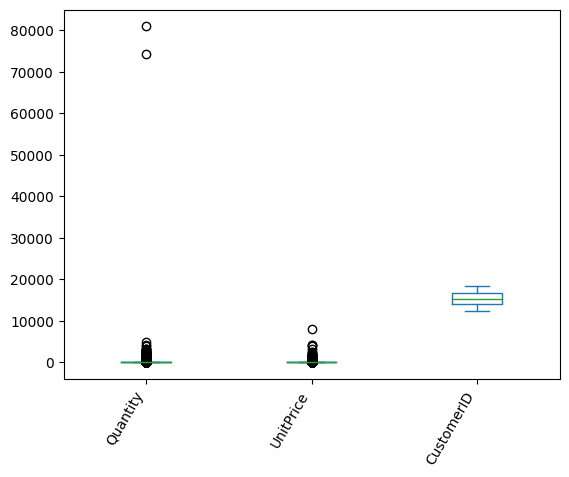

In [ ]:
N_df.plot.box()
plt.xticks(rotation=60, ha ='right');

####I noted that we have outliers in Quantity and UnitPrice, but it's hard to visualize them in a single plot because of the scale differences between the variables.

####When I encountered an error due to having columns with data types (object and strings), I found that the scale() function wouldn't work without the float or int data type. To resolve this, I dropped the columns 'InvoiceDate', 'InvoiceNo', 'StockCode', 'Description', and 'Country' to get the results.

In [ ]:
drop_NDF = N_df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'Country'], axis = 1, inplace=False)    #drop(columns=['B', 'C'])
drop_NDF.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850
1,6,2010-12-01 08:26:00,3.39,17850
2,8,2010-12-01 08:26:00,2.75,17850
3,6,2010-12-01 08:26:00,3.39,17850
4,6,2010-12-01 08:26:00,3.39,17850


In [ ]:
drop_NDF.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116498,15294.423453
std,179.331775,22.097875,1713.141560
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
drop_NDF.apply(scale)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



,Quantity,InvoiceDate,UnitPrice,CustomerID
0,-0.038968,-1.964463,-0.025636,1.491750
1,-0.038968,-1.964463,0.012377,1.491750
2,-0.027816,-1.964463,-0.016585,1.491750
3,-0.038968,-1.964463,0.012377,1.491750
4,-0.038968,-1.964463,0.012377,1.491750
...,...,...,...,...
541904,-0.005511,1.343239,-0.102566,-1.526101
541905,-0.038968,1.343239,-0.046000,-1.526101
541906,-0.050121,1.343239,0.046769,-1.526101
541907,-0.050121,1.343239,0.046769,-1.526101


##### Using scale to standardize data.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



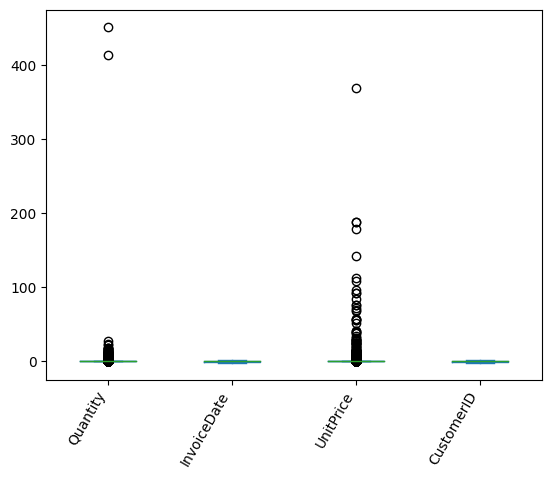

In [ ]:
drop_NDF.apply(scale).plot.box()
plt.xticks(rotation=60, ha ='right');

#####Showing the percentiles, to identify outliers.

In [ ]:
drop_NDF.describe (percentiles=[0.1, .25, .5, .66, .75, .87, .9, .99])

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116498,15294.423453
std,179.331775,22.097875,1713.141560
min,1.000000,0.040000,12346.000000
10%,1.000000,0.550000,12883.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
66%,10.000000,2.950000,16224.000000
75%,12.000000,3.750000,16795.000000
87%,24.000000,4.950000,17571.000000


####NOTE: We should consider excluding extreme outliers where the quantity of the item in the purchase exceeds 10,000 and the unit price is over 5,000.

####From the table above, it is evident that purchases with item quantities up to 10,000 account for 66%, and unit prices up to 5,000 account for 87% of the total.

####Creating 2 assumptions to remove items from purchase above 10,000 and unit price above 5,000.


In [ ]:
drop_NDF = drop_NDF.query ('Quantity < = 10.000 and UnitPrice < 5.001')
drop_NDF.describe()

,Quantity,UnitPrice,CustomerID
count,223259.000000,223259.000000,223259.000000
mean,3.907919,2.281221,15480.146158
std,2.824155,1.296947,1681.230023
min,1.000000,0.060000,12347.000000
25%,1.000000,1.250000,14121.000000
50%,3.000000,2.080000,15493.000000
75%,6.000000,2.950000,16932.000000
max,10.000000,5.000000,18287.000000


In [ ]:
drop_NDF.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850
1,6,2010-12-01 08:26:00,3.39,17850
2,8,2010-12-01 08:26:00,2.75,17850
3,6,2010-12-01 08:26:00,3.39,17850
4,6,2010-12-01 08:26:00,3.39,17850


####In the boxplot below, it is evident that the outliers have been excluded.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



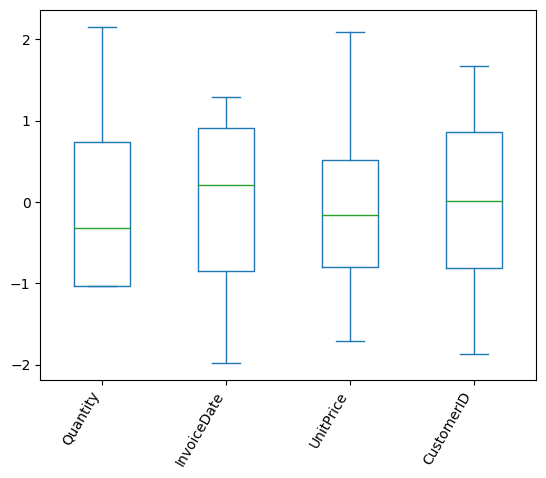

In [ ]:
drop_NDF.apply(scale).plot.box()
plt.xticks(rotation=60, ha ='right');

##### Create a list containing the removed columns and a for loop to reinsert them.

In [ ]:
colunas_removidas = ['InvoiceNo', 'StockCode', 'Description', 'Country']

for coluna in colunas_removidas:
    drop_NDF[coluna] = N_df[coluna]

In [ ]:
drop_NDF.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceNo,StockCode,Description,Country
0,6,2010-12-01 08:26:00,2.55,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,6,2010-12-01 08:26:00,3.39,17850,536365,71053,WHITE METAL LANTERN,United Kingdom
2,8,2010-12-01 08:26:00,2.75,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,6,2010-12-01 08:26:00,3.39,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,6,2010-12-01 08:26:00,3.39,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [ ]:
drop_NDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223259 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     223259 non-null  int64         
 1   InvoiceDate  223259 non-null  datetime64[ns]
 2   UnitPrice    223259 non-null  float64       
 3   CustomerID   223259 non-null  int64         
 4   InvoiceNo    223259 non-null  object        
 5   StockCode    223259 non-null  object        
 6   Description  223259 non-null  object        
 7   Country      223259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 15.3+ MB


#7.Creating an Additional Column with total purchase price.

####The new column is created to access the total sales value and then group the sales values by customers to determine the monetary value of each customer.

In [ ]:
drop_NDF['Total_Purchase_Price'] = drop_NDF['Quantity']*drop_NDF['UnitPrice']
drop_NDF.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceNo,StockCode,Description,Country,Total_Purchase_Price
0,6,2010-12-01 08:26:00,2.55,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30
1,6,2010-12-01 08:26:00,3.39,17850,536365,71053,WHITE METAL LANTERN,United Kingdom,20.34
2,8,2010-12-01 08:26:00,2.75,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00
3,6,2010-12-01 08:26:00,3.39,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,20.34
4,6,2010-12-01 08:26:00,3.39,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,20.34


In [ ]:
drop_NDF.describe()

,Quantity,UnitPrice,CustomerID,Total_Purchase_Price
count,223259.000000,223259.000000,223259.000000,223259.000000
mean,3.907919,2.281221,15480.146158,8.657489
std,2.824155,1.296947,1681.230023,7.514793
min,1.000000,0.060000,12347.000000,0.060000
25%,1.000000,1.250000,14121.000000,2.550000
50%,3.000000,2.080000,15493.000000,5.900000
75%,6.000000,2.950000,16932.000000,14.850000
max,10.000000,5.000000,18287.000000,49.600000


#8 - Last Date.

####In this step, we will calculate the date of the last purchase in the dataset as a whole. We will use this value as a comparison date to calculate Recency.

In [ ]:
drop_NDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223259 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Quantity              223259 non-null  int64         
 1   InvoiceDate           223259 non-null  datetime64[ns]
 2   UnitPrice             223259 non-null  float64       
 3   CustomerID            223259 non-null  int64         
 4   InvoiceNo             223259 non-null  object        
 5   StockCode             223259 non-null  object        
 6   Description           223259 non-null  object        
 7   Country               223259 non-null  object        
 8   Total_Purchase_Price  223259 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ MB


####Oldest sale.

In [ ]:
drop_NDF['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

####Latest Sale.

In [ ]:
drop_NDF['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
import datetime as dt

#### " day_d " This variable will be our reference for calculating Recency.

In [ ]:
dia_d = drop_NDF['InvoiceDate'].max() + dt.timedelta(days=1)
dia_d

Timestamp('2011-12-10 12:50:00')

#9. Plotting Graphs
####Top 10 countries with the highest sales value.

In [ ]:
drop_NDF.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'InvoiceNo',
       'StockCode', 'Description', 'Country', 'Total_Purchase_Price'],
      dtype='object')

In [ ]:
top_paises = drop_NDF.groupby('Country') ['Total_Purchase_Price'].sum().sort_values(ascending=False).head(10).reset_index()
top_paises

,Country,Total_Purchase_Price
0,United Kingdom,1702255.56
1,Germany,51939.53
2,France,49569.11
3,EIRE,39237.16
4,Belgium,13803.40
5,Spain,13447.48
6,Switzerland,9429.52
7,Portugal,8640.02
8,Norway,5048.45
9,Italy,4995.68


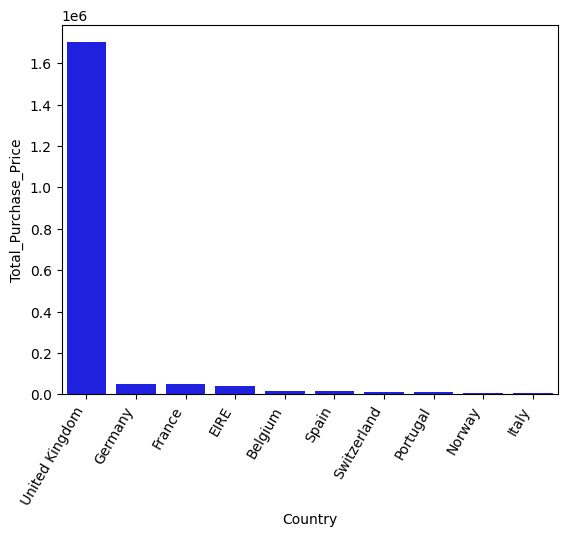

In [ ]:
ax=sns.barplot(data = top_paises, x= 'Country', y= 'Total_Purchase_Price', color = "blue");
plt.xticks(rotation = 60, ha='right');

####Top 10 best-selling products.

In [ ]:
top_produtos = drop_NDF.groupby('Description') ['Total_Purchase_Price'].sum().sort_values(ascending=False).head(10).reset_index()
top_produtos

,Description,Total_Purchase_Price
0,PARTY BUNTING,23620.05
1,WHITE HANGING HEART T-LIGHT HOLDER,17488.60
2,JUMBO BAG RED RETROSPOT,16898.22
3,SPOTTY BUNTING,16815.15
4,SET OF 3 CAKE TINS PANTRY DESIGN,15937.17
5,JAM MAKING SET WITH JARS,13231.75
6,LUNCH BAG RED RETROSPOT,12256.00
7,RETROSPOT TEA SET CERAMIC 11 PC,11988.90
8,SET OF 3 REGENCY CAKE TINS,11974.05
9,BAKING SET 9 PIECE RETROSPOT,11965.65


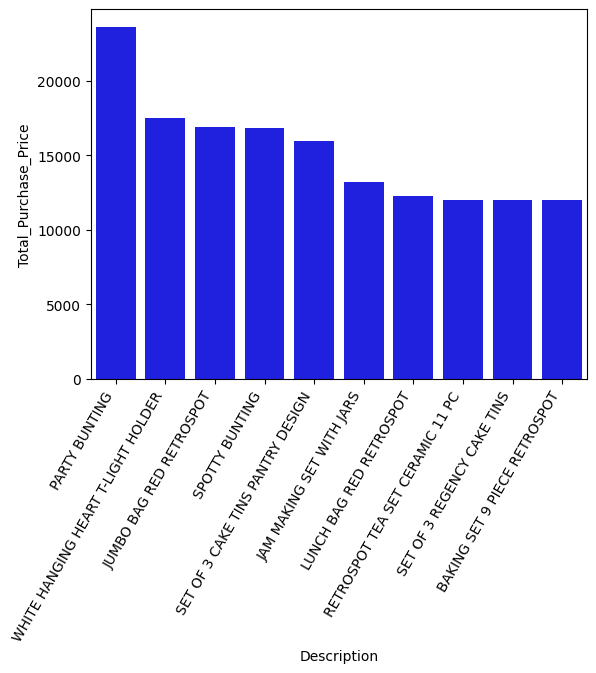

In [ ]:
ax=sns.barplot(data = top_produtos, x= 'Description', y= 'Total_Purchase_Price', color = "blue");
plt.xticks(rotation = 60, ha='right');

####Total Sales Value per month.

In [ ]:
drop_NDF.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'InvoiceNo',
       'StockCode', 'Description', 'Country', 'Total_Purchase_Price'],
      dtype='object')

In [ ]:
drop_NDF['Month'] = drop_NDF['InvoiceDate'].dt.to_period('M')
Total_vendas_mes = drop_NDF.groupby([drop_NDF["Month"]])["Total_Purchase_Price"].sum().sort_values(ascending=False).reset_index()
Total_vendas_mes

,Month,Total_Purchase_Price
0,2011-11,301087.08
1,2011-10,237620.43
2,2011-09,206724.53
3,2011-05,146267.88
4,2011-08,138475.35
5,2011-06,136099.18
6,2011-07,129358.91
7,2011-03,128663.38
8,2010-12,124910.64
9,2011-04,107560.38


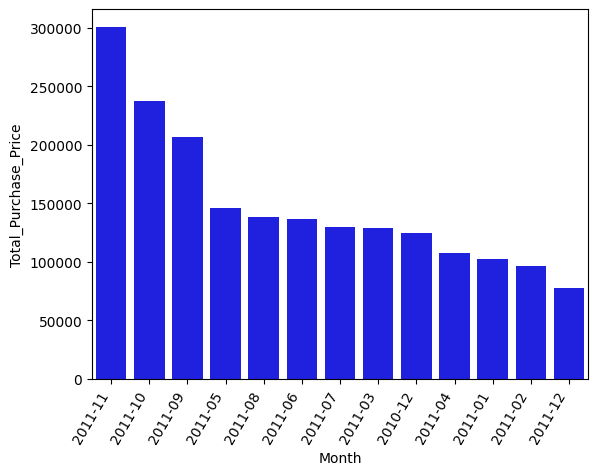

In [ ]:
ax=sns.barplot(data =Total_vendas_mes, x= 'Month', y= 'Total_Purchase_Price', color = "blue");
plt.xticks(rotation = 60, ha='right');


####Total Sales Value per Month and Country (Considering only the Top 10).

In [ ]:
# Adicionando uma coluna 'Month' no DataFrame 'drop_NDF' com colunas 'InvoiceDate' e 'Total_Purchase_Price'
drop_NDF['Month'] = drop_NDF['InvoiceDate'].dt.to_period('M')

# Total de vendas por mês
Total_vendas_mes = drop_NDF.groupby(["Month"])["Total_Purchase_Price"].sum().sort_values(ascending=False)

# Top 10 países com maiores vendas
top_countries_sales = drop_NDF.groupby(['Country'])['Total_Purchase_Price'].sum().sort_values(ascending=False).head(10).index

# Filtrando apenas os top 10 países
filtered_df = drop_NDF[drop_NDF['Country'].isin(top_countries_sales)]

# Agrupando por país e mês e somando o preço
grouped_df = filtered_df.groupby(['Country', 'Month'])['Total_Purchase_Price'].sum().reset_index()

# Verifique os dados filtrados
print("\nDados Filtrados e Agrupados:")
print(grouped_df)

# Pivotar os dados para ter meses como colunas
pivot_df = grouped_df.pivot(index='Month', columns='Country', values='Total_Purchase_Price')

# Verifique os dados pivotados
print("\nDados Pivotados:")
print(pivot_df)



Dados Filtrados e Agrupados:
            Country    Month  Total_Purchase_Price
0           Belgium  2010-12                302.49
1           Belgium  2011-01                409.91
2           Belgium  2011-02                834.85
3           Belgium  2011-03               1184.39
4           Belgium  2011-04                829.29
..              ...      ...                   ...
121  United Kingdom  2011-08             117104.12
122  United Kingdom  2011-09             181492.93
123  United Kingdom  2011-10             206253.02
124  United Kingdom  2011-11             269519.34
125  United Kingdom  2011-12              69585.69

[126 rows x 3 columns]

Dados Pivotados:
Country  Belgium     EIRE   France  Germany    Italy  Norway  Portugal  \
Month                                                                    
2010-12   302.49  2068.60  1984.64  2091.41   339.80  163.40    971.65   
2011-01   409.91   753.58  3582.80  4677.96   678.80     NaN    640.60   
2011-02   834.85  19

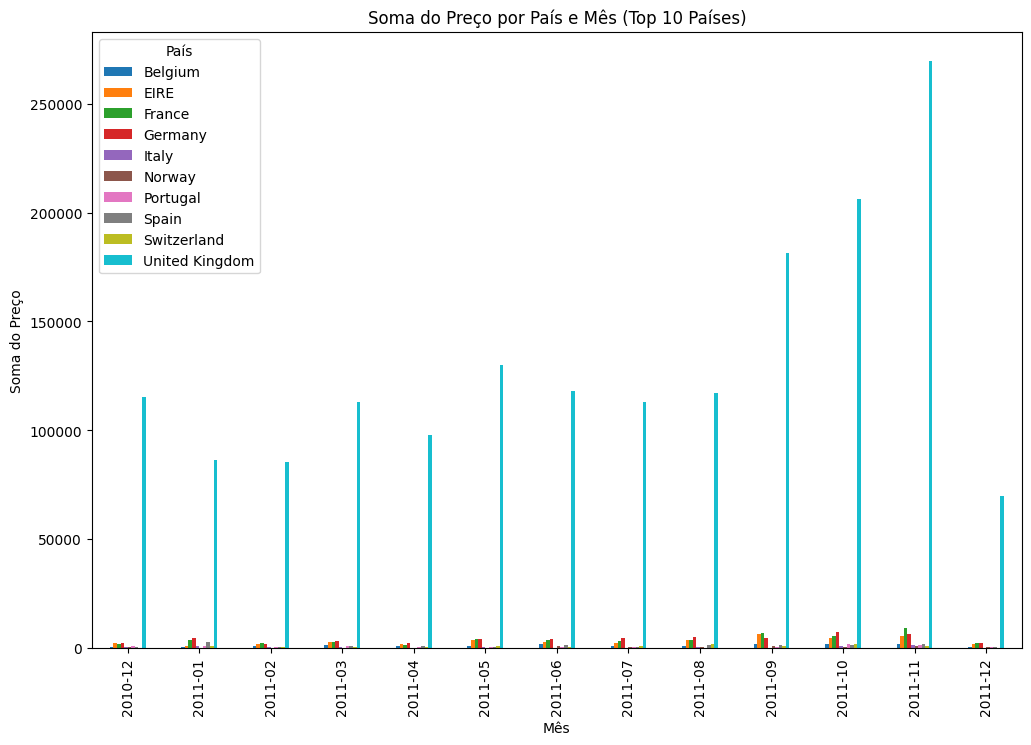

In [ ]:
# If `pivot_df` is not empty and contains numeric data, continue with the graph
if not pivot_df.empty and pivot_df.select_dtypes(include=['number']).shape[1] > 0:

    pivot_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Soma do Preço por País e Mês (Top 10 Países)')
    plt.xlabel('Mês')
    plt.ylabel('Soma do Preço')
    plt.legend(title='País')
    plt.show()
else:
    print("Nenhum dado numérico disponível para plotar.")

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.express as px

# Assuming you already have a 'drop_NDF' DataFrame with 'InvoiceDate' and 'Total_Purchase_Price' columns
# Adding a 'Month' column
drop_NDF['Month'] = drop_NDF['InvoiceDate'].dt.to_period('M')

# Total sales per month
Total_vendas_mes = drop_NDF.groupby(["Month"])["Total_Purchase_Price"].sum().sort_values(ascending=False)

# Top 10 countries with highest sales
top_countries_sales = drop_NDF.groupby(['Country'])['Total_Purchase_Price'].sum().sort_values(ascending=False).head(10).index

# Filtering only the top 10 countries
filtered_df = drop_NDF[drop_NDF['Country'].isin(top_countries_sales)]

# Grouping by country and month and adding the price
grouped_df = filtered_df.groupby(['Country', 'Month'])['Total_Purchase_Price'].sum().reset_index()

# Check filtered data
print("\nDados Filtrados e Agrupados:")
print(grouped_df)

# Converting the 'Month' column from period to string for the interactive chart
grouped_df['Month'] = grouped_df['Month'].astype(str)

# Plotting the interactive graph using plotly.express
fig = px.bar(grouped_df, x='Month', y='Total_Purchase_Price', color='Country', barmode='group',
             title='Soma do Preço por País e Mês (Top 10 Países)',
             labels={'Month': 'Mês', 'Total_Purchase_Price': 'Soma do Preço', 'Country': 'País'})

fig.update_layout(xaxis_title='Mês', yaxis_title='Soma do Preço', legend_title='País')
fig.show()



Dados Filtrados e Agrupados:
            Country    Month  Total_Purchase_Price
0           Belgium  2010-12                302.49
1           Belgium  2011-01                409.91
2           Belgium  2011-02                834.85
3           Belgium  2011-03               1184.39
4           Belgium  2011-04                829.29
..              ...      ...                   ...
121  United Kingdom  2011-08             117104.12
122  United Kingdom  2011-09             181492.93
123  United Kingdom  2011-10             206253.02
124  United Kingdom  2011-11             269519.34
125  United Kingdom  2011-12              69585.69

[126 rows x 3 columns]


#10.Calculation of RFM.
#####Dropping Month column.


In [ ]:
df_REG = drop_NDF.drop('Month', axis=1)
df_REG.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceNo,StockCode,Description,Country,Total_Purchase_Price
0,6,2010-12-01 08:26:00,2.55,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30
1,6,2010-12-01 08:26:00,3.39,17850,536365,71053,WHITE METAL LANTERN,United Kingdom,20.34
2,8,2010-12-01 08:26:00,2.75,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00
3,6,2010-12-01 08:26:00,3.39,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,20.34
4,6,2010-12-01 08:26:00,3.39,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,20.34


####Calculating the indices R, F and M.
####Grouping by the customer and applying the calculations to the columns InvoiceDate (difference of days for Recency), InvoiceNo (count for frequency), and Total_Purchase_Price (sum for Monetary Value).


In [ ]:
rfm = df_REG.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (dia_d - x.max()).days, 'InvoiceNo':'count','Total_Purchase_Price': 'sum'}).reset_index()
rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,Total_Purchase_Price
0,12347,2,74,1352.47
1,12349,19,28,440.94
2,12350,310,2,26.20
3,12352,36,33,534.78
4,12353,204,2,29.30


###Renaming the columns, as they are created with the original names and not the metrics.


In [ ]:
rfm = rfm.rename(columns={'InvoiceDate':'Recência','InvoiceNo':'Frequência','Total_Purchase_Price':'ValorMonetario'})
rfm.head()

,CustomerID,Recência,Frequência,ValorMonetario
0,12347,2,74,1352.47
1,12349,19,28,440.94
2,12350,310,2,26.20
3,12352,36,33,534.78
4,12353,204,2,29.30


####Observation:
####- R must be assigned in descending order (customers with lower R will receive higher levels).
####- F and M must be assigned in an increasing manner (clients with higher F and M will receive higher levels).



1. Creating R, F and M levels - 5 levels
2. Dividing the customer list into - 5 quartiles
3. Creating a table assigning RFM levels and RFM score (sum of levels)

In [ ]:
#1.
niveis_r =range(5,0,-1)
niveis_f=range(1,6)
niveis_m=range(1,6)

#2.
r_quintis = pd.qcut(rfm['Recência'], q=5, labels = niveis_r)
f_quintis = pd.qcut(rfm['Frequência'],q=5, labels = niveis_f)
m_quintis = pd.qcut(rfm['ValorMonetario'],q=5,labels = niveis_m)
rfm = rfm.assign(R=r_quintis,F=f_quintis,M=m_quintis)

#3.
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_cluster'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_score'] = rfm[['R','F','M']].sum(axis=1)
rfm['FM_media'] = rfm[['F','M']].mean(axis=1).round()
rfm = rfm.reset_index()
rfm.head()

,level_0,index,CustomerID,Recência,Frequência,ValorMonetario,R,F,M,RFM_cluster,RFM_score,FM_media
0,0,0,12347,2,74,1352.47,5,5,5,555,15,5.0
1,1,1,12349,19,28,440.94,4,3,4,434,11,4.0
2,2,2,12350,310,2,26.20,1,1,1,111,3,1.0
3,3,3,12352,36,33,534.78,3,4,4,344,11,4.0
4,4,4,12353,204,2,29.30,1,1,1,111,3,1.0


####This dataset will serve as the basis for all the various RFM analyses we will conduct.
####Now let's perform the pivot or transpose operation and then fill it with the number of customers.

In [ ]:
p_rfm = rfm.pivot_table(values='CustomerID', index='FM_media', columns='R', aggfunc = 'count', fill_value=0)
p_rfm = p_rfm.loc[[5.0, 4.0, 3.0, 2.0, 1.0],[1, 2, 3, 4, 5]]
p_rfm

R,1,2,3,4,5
FM_media,,,,,
5.0,7,28,67,143,273
4.0,113,224,299,324,327
3.0,60,82,97,84,55
2.0,349,281,218,156,109
1.0,263,161,134,75,43


Text(0.5, 1.0, 'Matriz RFM')

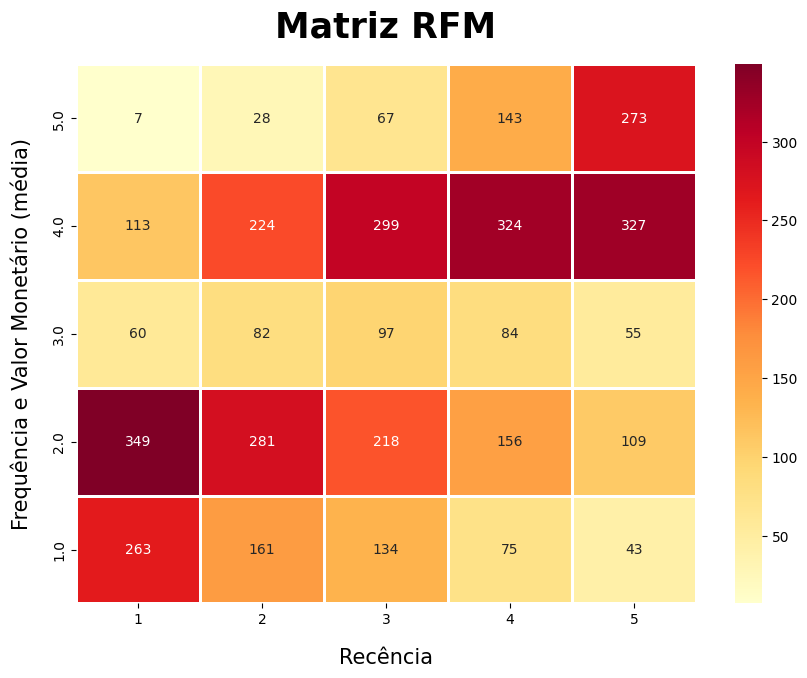

In [ ]:
plt.figure(figsize=(10,7))
plot = sns.heatmap(p_rfm,cmap='YlOrRd',linewidth=1, linecolor="white", annot=True, fmt ='.0f')
plot.set_xlabel('Recência', fontsize=15, labelpad=15)
plot.set_ylabel('Frequência e Valor Monetário (média)', fontsize=15, labelpad=15)
plot.set_title('Matriz RFM', fontsize=25, fontweight="bold", pad=20)

####Other possible queries include retrieving customers using different filters, such as:

####Identify high-performing customers (with an R level of 5 and an average F and M level of 5).

In [ ]:
rfm[rfm['RFM_cluster']=='555']

,level_0,index,CustomerID,Recência,Frequência,ValorMonetario,R,F,M,RFM_cluster,RFM_score,FM_media
0,0,0,12347,2,74,1352.47,5,5,5,555,15,5.0
13,13,13,12362,3,135,2321.83,5,5,5,555,15,5.0
54,54,54,12417,3,76,1217.23,5,5,5,555,15,5.0
82,82,82,12451,11,76,1426.01,5,5,5,555,15,5.0
95,95,95,12471,2,98,1956.10,5,5,5,555,15,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3864,3864,3864,18122,8,334,1516.52,5,5,5,555,15,5.0
3877,3877,3877,18145,13,114,1421.56,5,5,5,555,15,5.0
3930,3930,3930,18223,5,101,1975.11,5,5,5,555,15,5.0
3932,3932,3932,18225,3,125,1768.83,5,5,5,555,15,5.0


####Classification of sectors.

####It is feasible to designate pre-determined categories for each sector of the matrix. Here, we will be assigning the categories for the analysis.

In [ ]:
rfm['R'] = rfm['R'].astype('int64')
rfm['FM_media'] = rfm['FM_media'].astype('int64')

def classificar(rfm):
    if (rfm['FM_media'] == 5) and (rfm['R'] == 1):
        return 'Não posso perder esse cliente'
    elif (rfm['FM_media'] == 5) and ((rfm['R'] == 3) or (rfm['R'] == 4)):
        return 'Cliente fiel'
    elif (rfm['FM_media'] == 5) and (rfm['R'] == 5):
        return 'Excelente'
    elif (rfm['FM_media'] == 4) and (rfm['R'] >= 3):
        return 'Cliente fiel'
    elif (rfm['FM_media'] == 3) and (rfm['R'] == 3):
        return 'Necessita atenção'
    elif ((rfm['FM_media'] == 3) or (rfm['FM_media'] == 2))  and (rfm['R'] > 3):
        return 'Potencial de fidelidade'
    elif ((rfm['FM_media'] == 2) or (rfm['FM_media'] == 1)) and (rfm['R'] == 1):
        return 'Desconectado'
    elif (rfm['FM_media'] == 2) and (rfm['R'] == 2):
        return 'Em repouso'
    elif ((rfm['FM_media'] == 2) or (rfm['R'] == 1)) and (rfm['R'] == 3):
        return 'Pronto para repousar'
    elif (rfm['FM_media'] == 1) and (rfm['R'] == 2):
        return 'Desconectado'
    elif (rfm['FM_media'] == 1) and (rfm['R'] == 4):
        return 'Promissor'
    elif (rfm['FM_media'] == 1) and (rfm['R'] == 5):
        return 'Novos'
    else:
        return 'Em perigo de perder'

rfm['Classe'] = rfm.apply(classificar,axis=1)
rfm.head(20)

,level_0,index,CustomerID,Recência,Frequência,ValorMonetario,R,F,M,RFM_cluster,RFM_score,FM_media,Classe
0,0,0,12347,2,74,1352.47,5,5,5,555,15,5,Excelente
1,1,1,12349,19,28,440.94,4,3,4,434,11,4,Cliente fiel
2,2,2,12350,310,2,26.20,1,1,1,111,3,1,Desconectado
3,3,3,12352,36,33,534.78,3,4,4,344,11,4,Cliente fiel
4,4,4,12353,204,2,29.30,1,1,1,111,3,1,Desconectado
5,5,5,12354,232,27,418.00,1,3,4,134,8,4,Em perigo de perder
6,6,6,12355,214,7,169.20,1,2,3,123,6,2,Desconectado
7,7,7,12356,246,7,55.71,1,2,1,121,4,2,Desconectado
8,8,8,12357,33,8,206.70,4,2,3,423,9,2,Potencial de fidelidade
9,9,9,12358,151,2,32.70,2,1,1,211,4,1,Desconectado


#End.